# Insight One: 
    
  - Declining Quality over Time
    -  defined by both what you can get (lift) for the movie and audience rating

In [1]:
import sys

from dotenv import find_dotenv, dotenv_values
import matplotlib.pyplot as plt
import pandas as pd

config = dotenv_values(find_dotenv(".env"))

sys.path.append("..")
from src.make_data import build_metrics, filter_tv_shows
from src.plots import plot_median_movie_lift_over_time, plot_median_movie_score_over_time, colors_zebra_interview

sys.tracebacklimit = 0 # easier to see problems
plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
df = pd.read_csv(config["cleaned_data_path"])
print(df.shape)

df = build_metrics(df)

(4920, 30)
shape - (4920, 35), columns added - ['budget_log', 'gross_log', 'lift', 'profit', 'ROI']


## Eras in Movies

* rounding up to decades makes sense as it roughly fits the eras in movies

| Era                               | Characteristics                                                                                   | Notable Figures                      | Key Films                                         | Innovations/Trends                           | Estimated Number of Movies |
|-----------------------------------|---------------------------------------------------------------------------------------------------|---------------------------------------|--------------------------------------------------|----------------------------------------------|---------------------------|
| **Silent Era (1890s–1920s)**      | Silent films with live music or intertitles.                                                     | Charlie Chaplin, Buster Keaton       | *The Birth of a Nation* (1915), *Metropolis* (1927) | Early cameras, projection, editing.          | ~10,000–20,000           |
| **Golden Age (1930s–1940s)**      | Dominance of studios, genre films (musicals, westerns, noir).                                    | Humphrey Bogart, Katharine Hepburn   | *Gone with the Wind* (1939), *Casablanca* (1942) | Sound ("talkies"), Technicolor.              | ~50,000–75,000           |
| **Post-War Movements (1940s–50s)**| Darker themes, rise of international cinema (Neorealism, Film Noir, Japanese Golden Age).        | Akira Kurosawa, Vittorio De Sica     | *Bicycle Thieves* (1948), *Seven Samurai* (1954) | Portable cameras, natural lighting.          | ~40,000–60,000           |
| **New Hollywood (1960s–70s)**     | Auteur-driven, experimental, societal challenges.                                               | Martin Scorsese, Francis Coppola     | *The Godfather* (1972), *Star Wars* (1977)      | Blockbusters, innovative special effects.    | ~60,000–80,000           |
| **Blockbuster Era (1980s–90s)**   | High-concept films, franchises, global appeal.                                                  | James Cameron, Steven Spielberg      | *E.T.* (1982), *Titanic* (1997), *Jurassic Park* (1993) | CGI, improved sound systems, marketing.      | ~100,000–150,000         |
| **Digital Era (2000s–Present)**   | Dominance of digital editing, streaming platforms, global cinema.                               | Christopher Nolan, Bong Joon-ho      | *The Lord of the Rings* (2001–03), *Parasite* (2019) | Advanced CGI, motion capture, 3D, streaming. | ~200,000+                |

## Notable Film Movements
| Movement                | Characteristics                                                                                 | Key Films                          | Estimated Number of Movies |
|-------------------------|-------------------------------------------------------------------------------------------------|------------------------------------|----------------------------|
| **French New Wave**     | Experimental, stylistic freedom (*1950s–1960s*).                                               | *Breathless* (1960), *The 400 Blows* (1959) | ~500–1,000              |
| **German Expressionism**| Highly stylized, dark themes (*1920s*).                                                        | *The Cabinet of Dr. Caligari* (1920) | ~200–300                |
| **Dogme 95**            | Minimalist filmmaking, strict rules (*1990s*).                                                | Lars von Trier films (*Breaking the Waves*, 1996) | ~100–200               |

[Source: History of Film](https://en.wikipedia.org/wiki/History_of_film)

validated on wikipedia and taken from ChatGPT


In [3]:
## validation -- IMDB has about 600,000 movie titles as of September 2024 (looks like a reasonable estimate compared to imbd)
assert (20000 + 75000 + 60000 + 80000 + 150000 + 200000) > 0.9 * 600000, 'estimate is more than 10% off base'

## Movie Year

*  Understand where its missing
*  useful to group into decades or eras

In [4]:
# only movies since can't seperate tv shows from movies
df = filter_tv_shows(df)

In [5]:
print("We have Movie data from {} to {}".format(df["title_year"].min().astype(int), df["title_year"].max().astype(int)))

df["decade"].value_counts().to_frame("count").reset_index().sort_values("decade",ascending=False)


We have Movie data from 1916 to 2016


,decade,count
1,2010,1440
0,2000,2055
2,1990,780
3,1980,277
4,1970,109
5,1960,70
6,1950,27
7,1940,25
8,1930,15
9,1920,5


In [6]:
# what was the 1916 movie? out of curiosity 
df.loc[df["title_year"] == 1916].T

,3518
color,Black and White
director_name,D.W. Griffith
num_critic_reviews,69.0
duration,123.0
director_facebook_likes,204.0
actor_3_facebook_likes,9.0
actor_2_name,Mae Marsh
actor_1_facebook_likes,436.0
gross,NaN
genres,Drama|History|War


shape - (6, 12), columns added - ['budget_log', 'gross_log', 'lift', 'profit', 'ROI']


,decade,n,median_score,movie_score,gross,budget,avg_users_voted,budget_log,gross_log,lift,profit,ROI
0,1960,143,7.6,1063.4,1.925068e+09,5.238533e+08,62429.94,20.076722,21.378227,3.674823,1.401215e+09,2.674823
1,1970,109,7.3,774.5,3.480879e+09,8.572441e+08,98505.94,20.569233,21.970551,4.060546,2.623635e+09,3.060546
2,1980,277,6.8,1834.3,1.092841e+10,5.036343e+09,79733.15,22.339946,23.114631,2.169909,5.892064e+09,1.169909
3,1990,780,6.6,5084.0,3.454790e+10,2.799085e+10,89972.95,24.055144,24.265612,1.234257,6.557045e+09,0.234257
4,2000,2055,6.5,13057.0,8.088844e+10,8.925394e+10,83342.15,25.214751,25.116337,0.906273,-8.365503e+09,-0.093727
5,2010,1440,6.4,9003.8,6.138179e+10,5.063858e+10,83260.88,24.647980,24.840379,1.212155,1.074321e+10,0.212155


In [15]:
p = plot_median_movie_score_over_time(tbl)
plt.show(p)

KeyError: "Column(s) ['movie_title', 'num_users_voted'] do not exist"

***

* the median user review is getting lower and lower, users on IMDB think the quality of movies released is lower and lower
* we also see the need to really improve our data quality as the 108 movies that don't have a title year are also the ones that are highly rated.

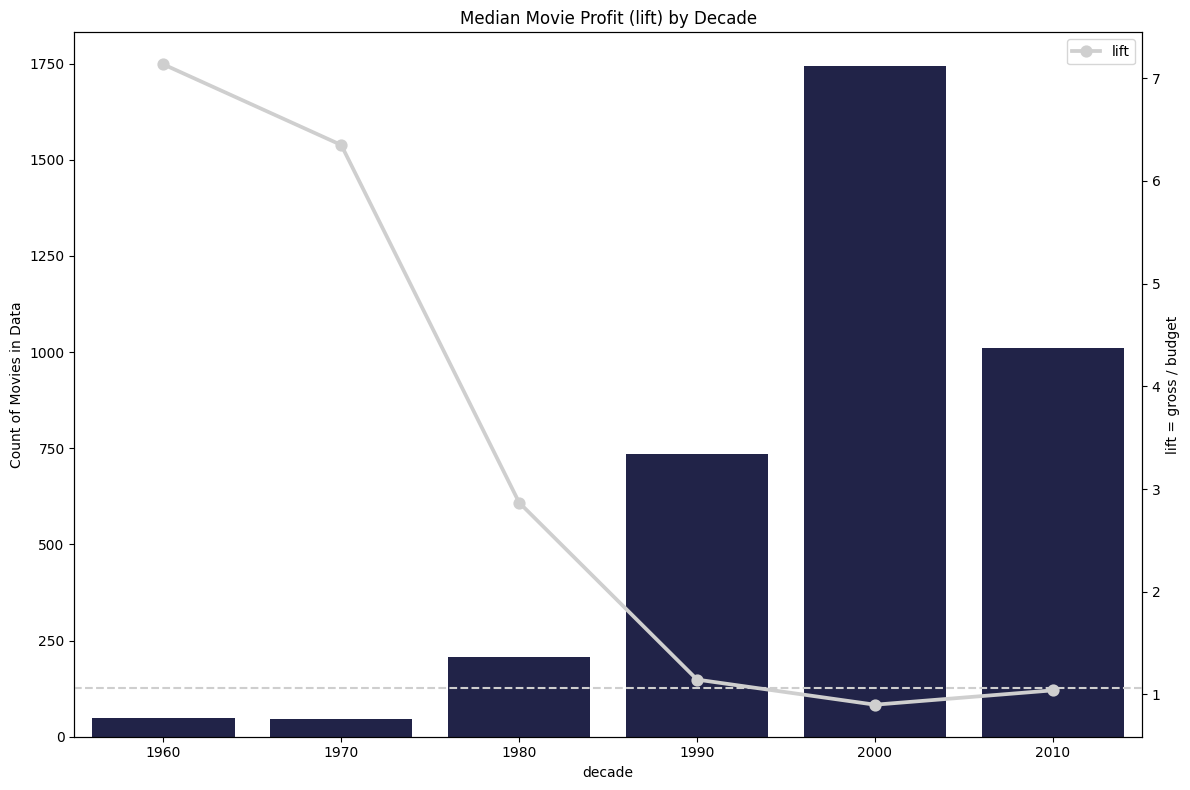

In [11]:


p = plot_median_movie_lift_over_time(df)
plt.show(p)

***

* at the same time the number of movies is exploding and the quality of the reviews dropping the profitability is dropping